In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
import warnings 
from pathlib import Path  
warnings.filterwarnings('ignore')

In [2]:
con = sqlite3.connect(r"/Users/0xnrous/Developer/End2End_DataScience/Predicting_Password Robustness _via_NLP/e2e_ML_predicting_password_strength_enhancing_cybersecurity/data/raw/password_data.sqlite")

In [3]:
data = pd.read_sql_query("SELECT * from Users", con)

In [4]:
data.sample(9)

,index,password,strength
17192,17192,qqbadabacsi24,1
65683,65683,superi2584,1
27490,27490,584241bmx,1
88898,88898,localhost12,1
783,783,talmud1,0
84897,84897,y3sw3can,1
39893,39893,marta861,1
52614,52614,marvinstacy1,1
4248,4248,psalm119,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [6]:
filepath = Path('/Users/0xnrous/Developer/End2End_DataScience/Predicting_Password Robustness _via_NLP/e2e_ML_predicting_password_strength_enhancing_cybersecurity/data/processed/Ndata.csv')
data.to_csv(filepath , index= False)

In [7]:
df = pd.read_csv('/Users/0xnrous/Developer/End2End_DataScience/Predicting_Password Robustness _via_NLP/e2e_ML_predicting_password_strength_enhancing_cybersecurity/data/processed/Ndata.csv')

In [8]:
df.head(7)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1
5,5,16623670p,1
6,6,yj9q3f8p,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [10]:
#df.drop(['index'], axis=1, inplace=True)

In [11]:
df.sample()

,index,password,strength
90141,90141,epage804,1


In [12]:
df['strength'].unique()

array([1, 2, 0])

In [13]:
df.isna().sum()

index       0
password    0
strength    0
dtype: int64

<Axes: xlabel='strength', ylabel='count'>

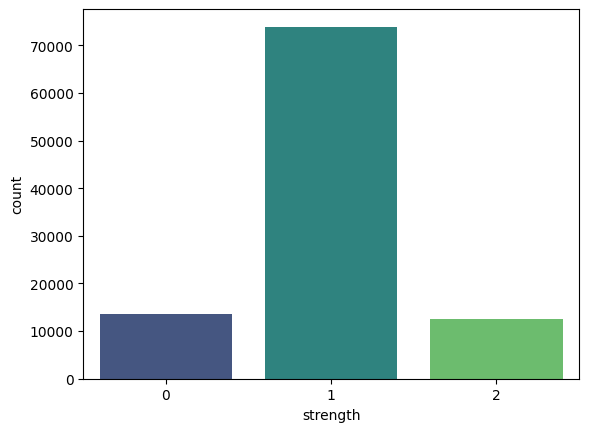

In [21]:
sns.countplot(data=df, x='strength', palette='viridis')

### Basic Data Cleaning 

In [23]:
df.columns

Index(['index', 'password', 'strength'], dtype='object')

In [24]:
# removing ir-relevant features
df.drop(['index'], axis = 1 , inplace= True)

### Removing Duplicates

In [26]:
df.duplicated().sum()

0

In [27]:
df

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [28]:
# checking missing values 
df.isna().sum()

password    0
strength    0
dtype: int64

In [29]:
# if any feature have NAN values
df.isnull().any().sum()

0

In [31]:
# checking datatypes of every feature
df.dtypes

password    object
strength     int64
dtype: object

In [33]:
# checking wether 'strenth' feature has ir-relavant values or not 
df['strength'] , df['strength'].unique()

(0        1
 1        1
 2        1
 3        2
 4        1
         ..
 99995    1
 99996    1
 99997    1
 99998    1
 99999    1
 Name: strength, Length: 100000, dtype: int64,
 array([1, 2, 0]))